In [2]:
#importing required packages

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

In [3]:
#Read the csv file

hr = pd.read_csv("HR_comma_sep.csv", sep=',')

In [1]:
import csv
import json

csvfile = open('ign.csv', 'r')
jsonfile = open('ign.json', 'w')

fieldnames = ("id","tweet_id","screen_name","created_at","text")
reader = csv.DictReader( csvfile, fieldnames)
for row in reader:
    json.dump(row, jsonfile)
    jsonfile.write('\n')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 538: character maps to <undefined>

In [4]:
#Display top 10 records
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
#Create backup of original file
hr_bak=hr.copy()

In [6]:
#Check for missing values
hr_bak.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
#Check data types
hr_bak.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [8]:
#Check unique values of Sales column
hr_bak['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
#Replace name of Sales column to Department
hr_bak.rename(columns={'sales': 'department'}, inplace=True)
hr_bak.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
#Checking unique values of department
hr_bak['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
#Check vales of salary column amd map it accordingly as we need it for our analysis
hr_bak['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
#Replace low, medium and high to 1,5,10 respectively
hr_bak.salary.replace({'low':1,'medium':5,'high':10},inplace=True)
#check the results
hr_bak.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,5
2,0.11,0.88,7,272,4,0,1,0,sales,5
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
5,0.41,0.50,2,153,3,0,1,0,sales,1
6,0.10,0.77,6,247,4,0,1,0,sales,1
7,0.92,0.85,5,259,5,0,1,0,sales,1
8,0.89,1.00,5,224,5,0,1,0,sales,1
9,0.42,0.53,2,142,3,0,1,0,sales,1


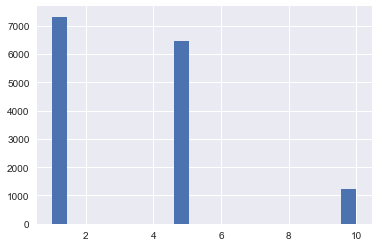

In [13]:
hr_bak['salary'].hist(bins=20)

#Very few employees with high salary

In [14]:
#Summary statistics
hr_bak.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.461297
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.738421
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,5.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000


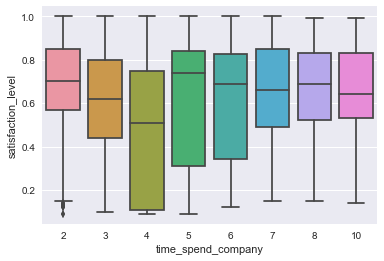

In [15]:
#Check for outliers
sns.boxplot(x="time_spend_company", y="satisfaction_level", data=hr_bak);



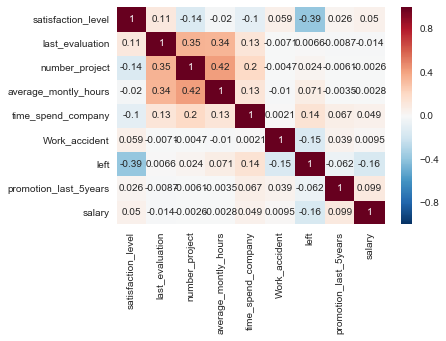

In [16]:
#Correlation between columns
corr=hr_bak.corr()
sns.heatmap(corr,annot=True)

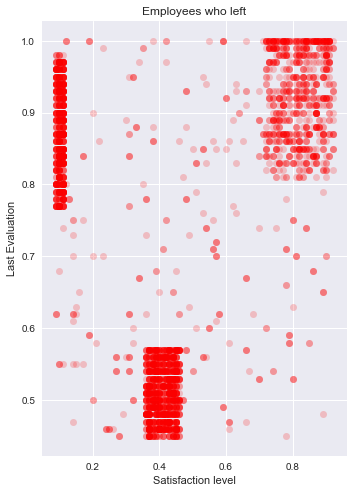

In [17]:
#Relation between satisfaction level and last evaluation of the employees who left
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(hr_bak.satisfaction_level[hr_bak.left == 1],hr_bak.last_evaluation[hr_bak.left == 1],'ro', alpha = 0.2)
plt.ylabel('Last Evaluation')
plt.xlabel('Satisfaction level')
plt.title('Employees who left')

There are 3 types of employees who left
1. With high satiscfaction and high last evaluation: those who leave because they were offered a better opportunity
2. High evaluation but not satisfied: those who leave because they migh not be happy with what thwy are doing(Over qualified)
3. Low evaluated and not satisfied: those who have to leave because of performance

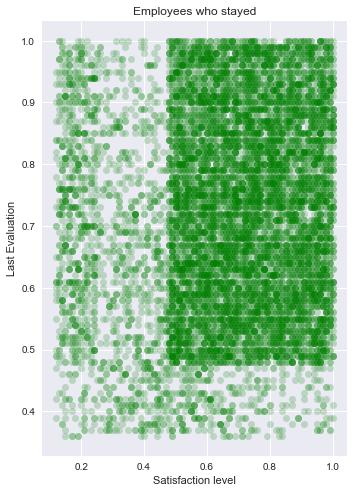

In [18]:
#Relation between satisfaction level and last evaluation of the employees who stayed
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(hr_bak.satisfaction_level[hr_bak.left == 0],hr_bak.last_evaluation[hr_bak.left == 0],'go', alpha = 0.2)
plt.ylabel('Last Evaluation')
plt.xlabel('Satisfaction level')
plt.title('Employees who stayed')

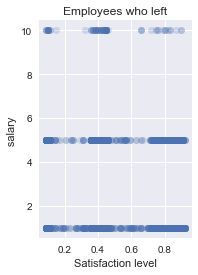

In [19]:
#Relation between satisfaction level and salary of the employees who left
plt.subplot(1,2,1)
plt.plot(hr_bak.satisfaction_level[hr_bak.left == 1],hr_bak.salary[hr_bak.left == 1],'o', alpha = 0.2)
plt.ylabel('salary ')
plt.xlabel('Satisfaction level')
plt.title('Employees who left')

#Employee with lower salary are more likely to leave the organization

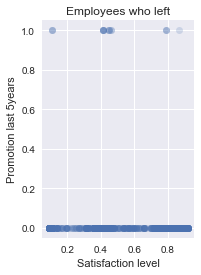

In [20]:
#Relation between satisfaction level and promotion last 5years of the employees who left
plt.subplot(1,2,1)
plt.plot(hr_bak.satisfaction_level[hr_bak.left == 1],hr_bak.promotion_last_5years[hr_bak.left == 1],'o', alpha = 0.2)
plt.ylabel('Promotion last 5years')
plt.xlabel('Satisfaction level')
plt.title('Employees who left')

#Employees who aren't promoted in last 5 years leaves more

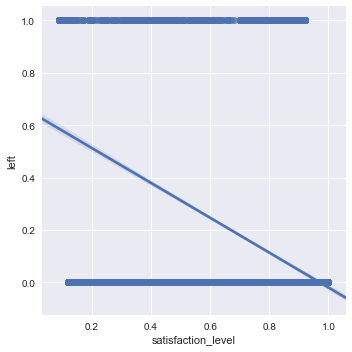

In [21]:
sns.lmplot(x="satisfaction_level", y="left", data=hr_bak)

#Employees with lowest satisfaction are more likely to leave

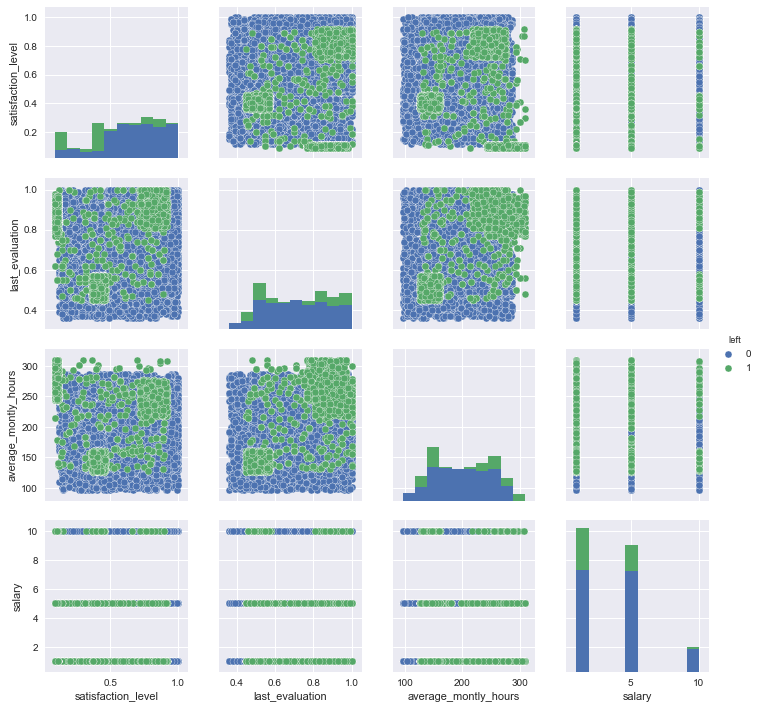

In [22]:
sns.pairplot(hr_bak, hue="left", vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours','salary'])
plt.show()

#1 Appreciated but not satisfied employees left (satisfaction_level VS last_evaluation)
#2 Satisfied but higher number of work hours employees left (satisfaction_level VS average_montly_hours)
#3 Unsatisfied employees left even with highest salary 

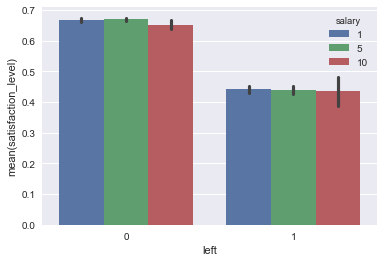

In [23]:
sns.barplot(x="left", y="satisfaction_level", hue="salary", data=hr_bak)
#Employees with lower satisfaction level tends to leave even with high salary

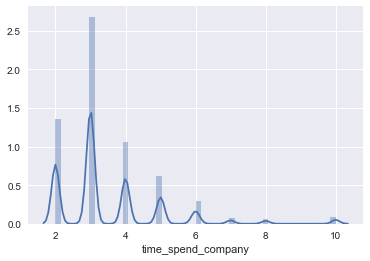

In [24]:
sns.distplot(hr_bak['time_spend_company'])

#Maximum employees with 3 years spent in company

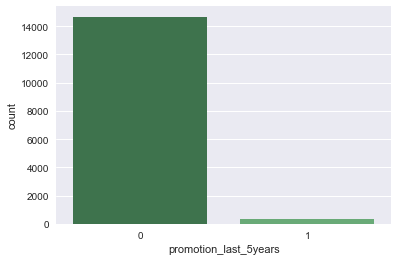

In [25]:
sns.countplot(x="promotion_last_5years", data=hr_bak, palette="Greens_d")
#Very few employees wich are promoted in last five years 

In [27]:
X = hr_bak[["time_spend_company"]]
y = hr_bak[["satisfaction_level"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 0.67291701] [[-0.01717538]]


In [28]:
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                 3.611e+04
Date:                Thu, 12 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:30:44   Log-Likelihood:                -5887.1
No. Observations:               14999   AIC:                         1.178e+04
Df Residuals:                   14998   BIC:                         1.178e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
time_spend_company     0.1466      0.001    190.013      0.000       0.145       0.148
==============================================================================
Omnibus:                     1032.738   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1258.088
Skew:                          -0.705   Prob(JB):                    6.45e-274
Kurtosis:                       3.162   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""